In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
#dataset from kaggle

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/-H0BcPr512mhbTDDfkcTJA/comments-with-emotions.csv')

In [4]:
df

,comment,like_count,published_at,author,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
0,If this fight were real and not just an exhibi...,0,2024-10-26T01:19:27Z,@thesecond4113,Positive,"{'anger': 3, 'fear': 3, 'negative': 2, 'positi...",3.0,3.0,2.0,8.0,7.0,6.0,5.0,2.0,2.0,1.0,1
1,Tyson will bust his hide. People forget with h...,0,2024-10-26T01:09:55Z,@bluesslider76,Neutral,"{'fear': 2, 'negative': 3, 'anticipation': 1, ...",1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,2024-10-26T00:19:29Z,@thechaosmaster9934,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Watching cm punk fight in the ufc is better th...,0,2024-10-26T00:16:10Z,@tokesenari,Positive,"{'anger': 2, 'fear': 1, 'negative': 1}",2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Yall forget how much Ring IQ this guy has. AND...,0,2024-10-25T23:53:49Z,@HumbleAstronaut,Positive,"{'negative': 1, 'positive': 1, 'anticipation': 1}",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,WTF,0,2024-10-15T13:01:03Z,@ischubbypinkcheekscute8408,Negative,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1152,Is this real or a joke?,42,2024-10-15T13:01:00Z,@moondancecoffee,Positive,"{'positive': 1, 'trust': 1, 'negative': 1}",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1153,Bruh,0,2024-10-15T13:00:56Z,@H20_BadOnMyEnd,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1154,First comment 😂,0,2024-10-15T13:00:37Z,@josmith1184,Positive,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
#data preprocessing

In [6]:
df = df.drop_duplicates()


df = df.dropna()

df = df.drop(columns=['published_at', 'author'])

df

,comment,like_count,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
0,If this fight were real and not just an exhibi...,0,Positive,"{'anger': 3, 'fear': 3, 'negative': 2, 'positi...",3.0,3.0,2.0,8.0,7.0,6.0,5.0,2.0,2.0,1.0,1
1,Tyson will bust his hide. People forget with h...,0,Neutral,"{'fear': 2, 'negative': 3, 'anticipation': 1, ...",1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Watching cm punk fight in the ufc is better th...,0,Positive,"{'anger': 2, 'fear': 1, 'negative': 1}",2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Yall forget how much Ring IQ this guy has. AND...,0,Positive,"{'negative': 1, 'positive': 1, 'anticipation': 1}",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,WTF,0,Negative,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1152,Is this real or a joke?,42,Positive,"{'positive': 1, 'trust': 1, 'negative': 1}",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1153,Bruh,0,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1154,First comment 😂,0,Positive,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


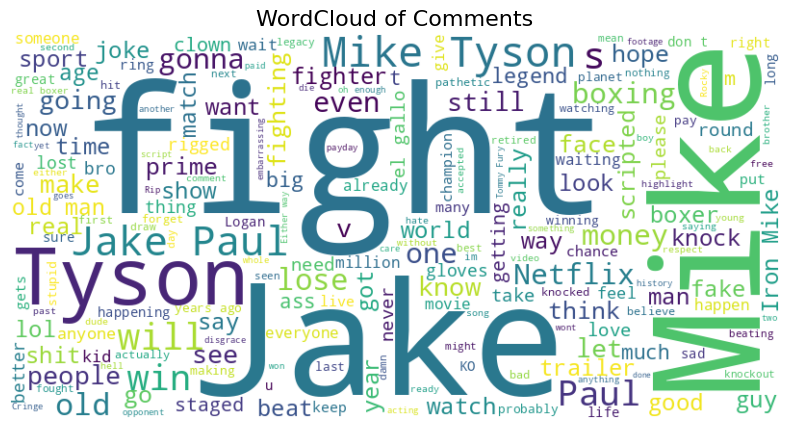

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for 'comment' column
text = " ".join(comment for comment in df['comment'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Comments", fontsize=16)
plt.show()

In [8]:
#distribution plot

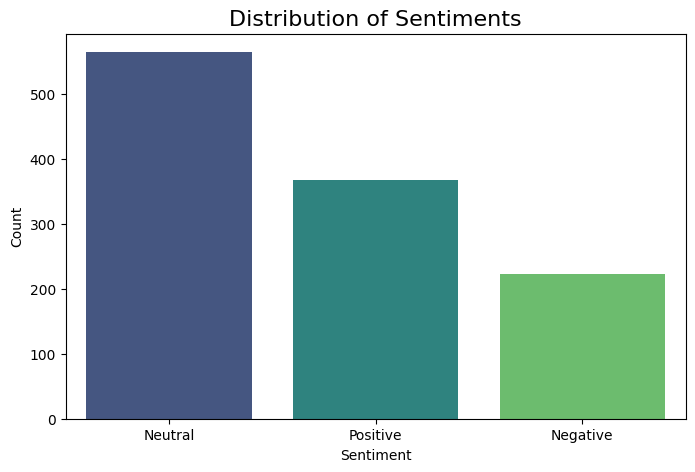

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [10]:
#correlation heatmap for emotions

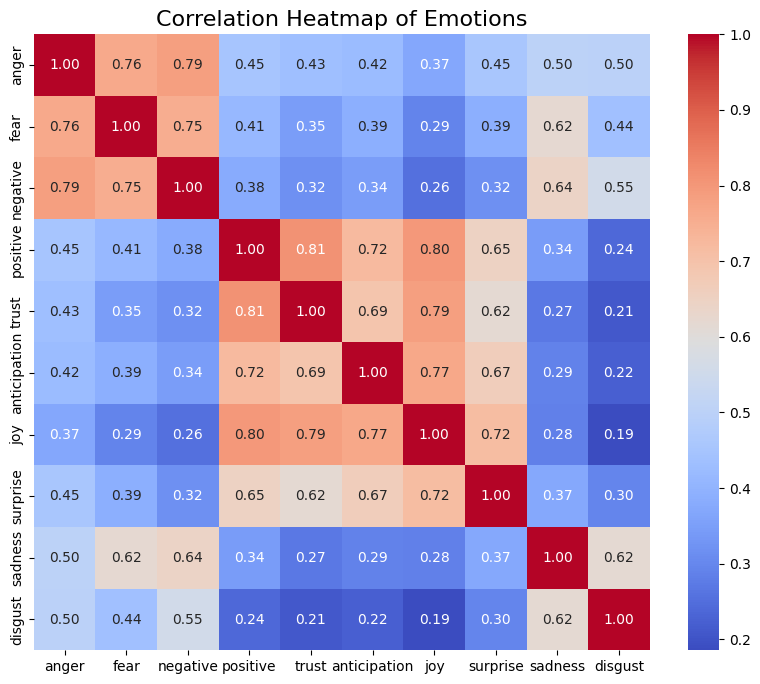

In [11]:
import seaborn as sns

emotion_columns = ['anger', 'fear', 'negative', 'positive', 'trust',
                   'anticipation', 'joy', 'surprise', 'sadness', 'disgust']
correlation_matrix = df[emotion_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Emotions", fontsize=16)
plt.show()

In [12]:
#barplot

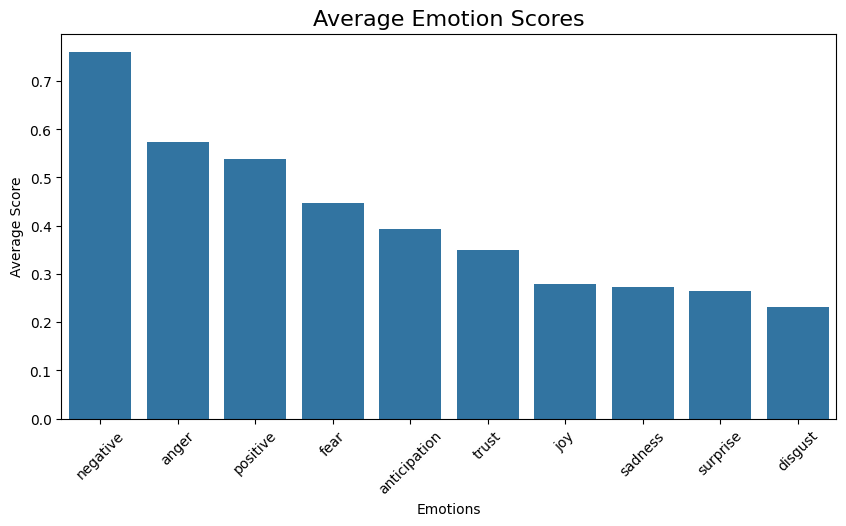

In [13]:
# Barplot of top emotions
mean_emotions = df[emotion_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_emotions.index, y=mean_emotions.values)
plt.title("Average Emotion Scores", fontsize=16)
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


In [14]:
#Top 10 most common words in comments

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


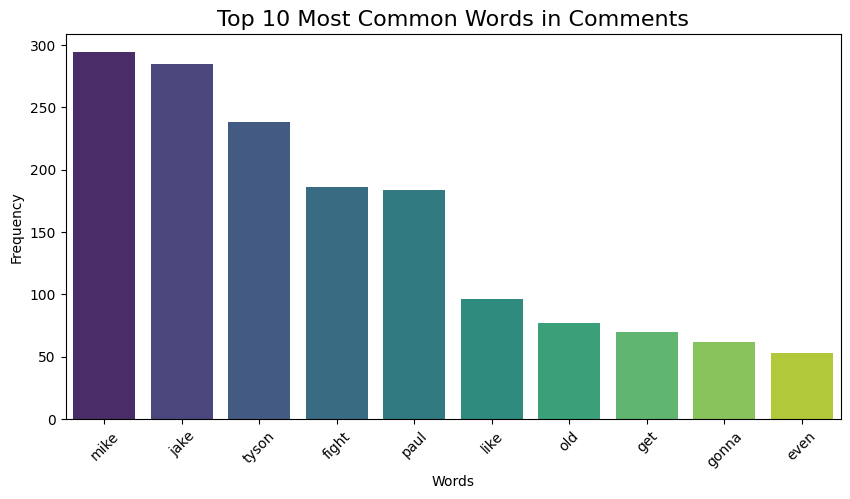

In [15]:
# Top 10 most common words in comments
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = " ".join(df['comment'].astype(str)).split()
filtered_words = [word.lower() for word in all_words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Common Words in Comments", fontsize=16)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [16]:
#pairplot


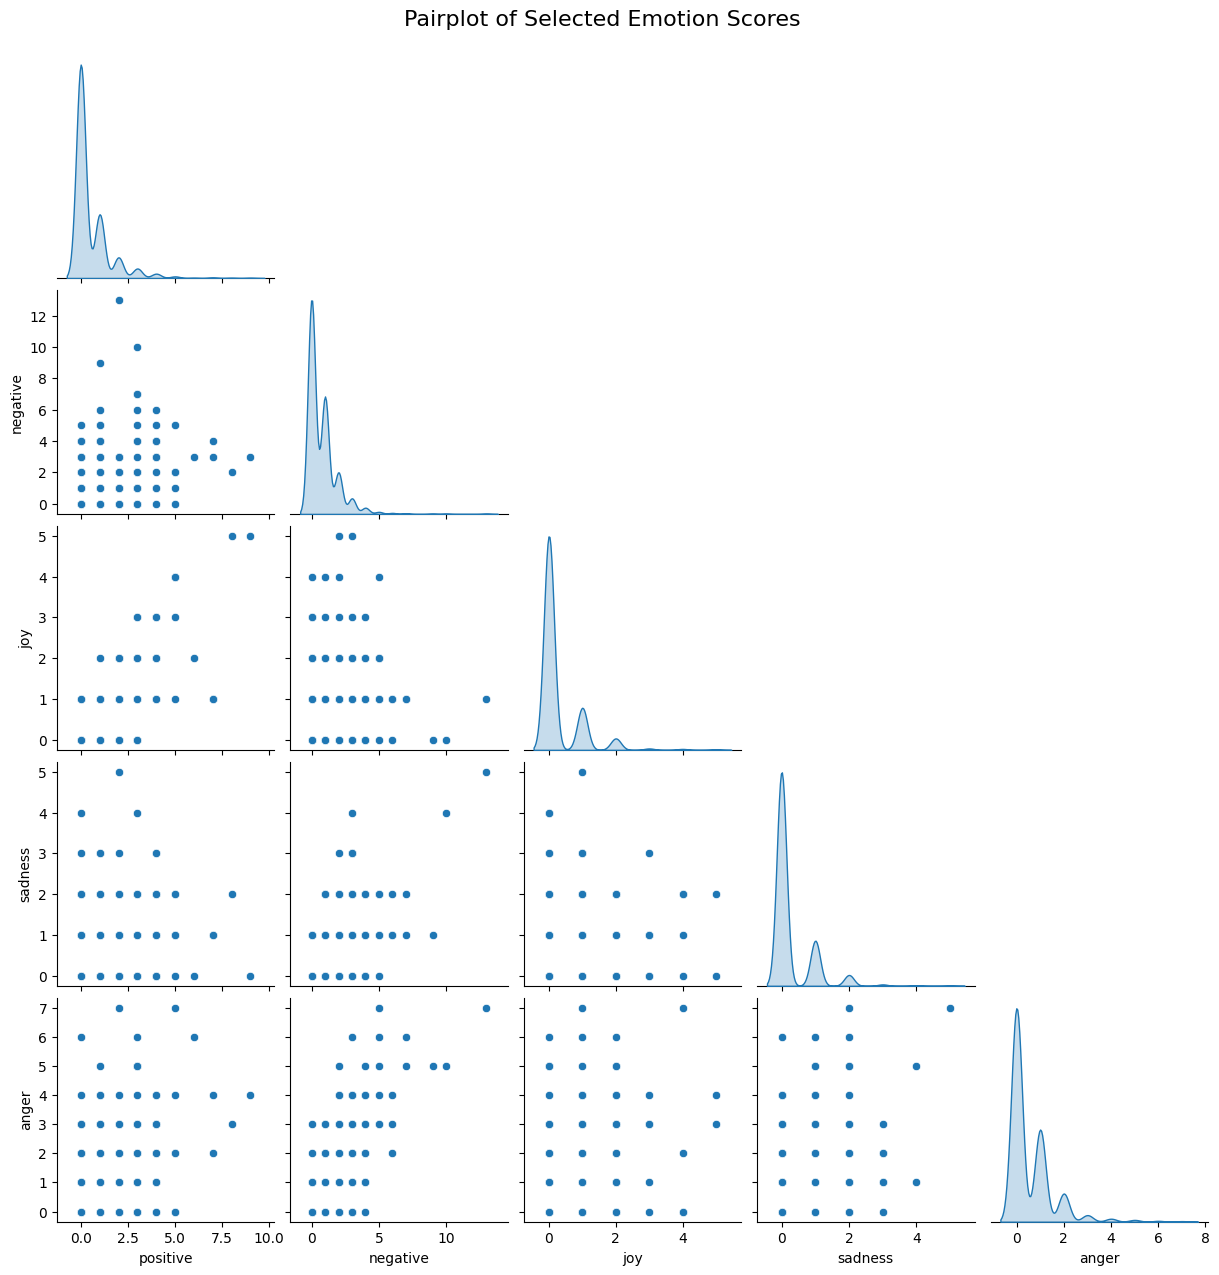

In [17]:
# Pairplot for selected emotion columns
selected_emotions = ['positive', 'negative', 'joy', 'sadness', 'anger']
sns.pairplot(df[selected_emotions], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Emotion Scores", y=1.02, fontsize=16)
plt.show()

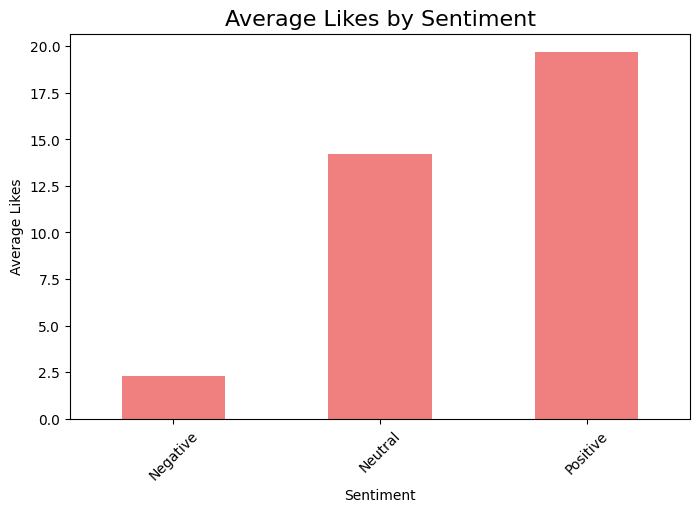

In [18]:
# Average likes by sentiment
avg_likes = df.groupby('sentiment')['like_count'].mean()
plt.figure(figsize=(8, 5))
avg_likes.plot(kind='bar', color='lightcoral')
plt.title("Average Likes by Sentiment", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

In [19]:
top_positive_comments = df.sort_values(by='negative', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'negative']])

                                               comment  negative
280  Mr Tyson  no disrespect bro , please , PLEASE ...      13.0
90   Even if Mike Tyson loses the fight, he ultimat...      10.0
949  This is getting real old fast hurry the hell u...       9.0
668  Hahahahahaha. The fight is the year. That’s hi...       7.0
601  Why paul even do this anyway, you wanna prove ...       7.0
